# Title: Giant Enhancement of Unconventional Photon Blockade in a Dimer Chain——PhysRevLett.127.240402

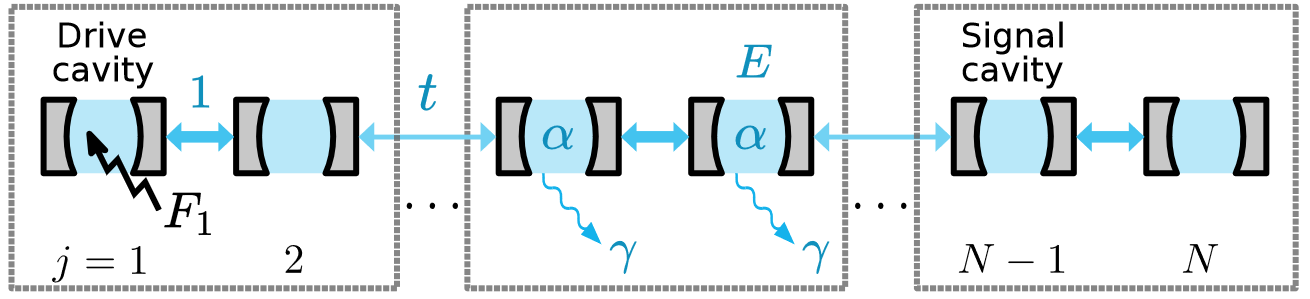

## The Lindblad master equation 

$$\dot{\rho}=-i[\mathcal{H}_{\text{tot}},\rho]+\frac{\gamma}{2}\sum_{j=1}^{N}\left(2a_j\rho a_j^\dagger-a_j^\dagger a_j\rho -\rho a_j^\dagger a_j\right),$$
where $\mathcal{H}_{\text{tot}}=\mathcal{H}_0+\mathcal{H}_d$, which are given by
$$ \mathcal{H}_0=\sum_{j=1}^N\left(Ea_j^\dagger a_j+\alpha a_j^\dagger a_j^\dagger a_j a_j\right)+\left[\sum_{j=1}^{N/2}\left(a_{2j-1}^\dagger a_{2j}+\text{h.c.}\right)+t\sum_{j=1}^{N/2-1}\left(a_{2j}^\dagger a_{2j+1}+\text{h.c.}\right) \right],$$
$$\mathcal{H}_d=F_1(a_1^\dagger+a_1).$$

The corresponding effective Hamiltonian is
$$\mathcal{H}_{\text{eff}}=\sum_{j=1}^N\left[\left(E-i\gamma/2\right)a_j^\dagger a_j+\alpha a_j^\dagger a_j^\dagger a_j a_j\right]+\left[\sum_{j=1}^{N/2}\left(a_{2j-1}^\dagger a_{2j}+\text{h.c.}\right)+t\sum_{j=1}^{N/2-1}\left(a_{2j}^\dagger a_{2j+1}+\text{h.c.}\right) \right].$$

In [1]:
from qcs_phy import qcs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [3]:
# system fixed parameters
t = 0.1

## Figure 2.(b)
$$E=\frac{\gamma}{2}\cot\left(\frac{N}{N+1}\frac{\pi}{2}\right)$$

In [4]:
# system parameters
Nlist = [2, 4, 6, 8, 10]
α_list = 10 ** (np.linspace(-6,-1,1000))
γ_list = [0.3, 0.4, 0.5]
ωd = 0

In [5]:
alpha_list_gam = []
for γ in γ_list:
    alpha_list = []
    for N in Nlist:
        E = γ/(2*np.tan((N/(N+1))*np.pi/2))
        # construct Input and Output channels
        mode_i = [np.sqrt(1/2), ("a", 0)]
        mode_o = [np.sqrt(1/2), ("a", N-2)]
        Input = qcs.Input_channel("b", mode_i, ωd)
        Output = qcs.Output_channel("c", mode_o)

        # construct effective Hamiltonian and calculate 2nd-order ETCF
        g2_0 = []

        for α in α_list:
            Heff = []
            for i in range(N):
                Heff.append([(E-1j*γ/2), ("ad", i), ("a", i)])
                Heff.append([α, ("ad", i), ("ad", i), ("a", i), ("a", i)])
            for i in range(int(N/2)):
                Heff.append([1, ("ad", 2*i), ("a", 2*i+1)])
                Heff.append([1, ("a", 2*i), ("ad", 2*i+1)])
            for i in range(int(N/2)-1):
                Heff.append([t, ("ad", 2*i+1), ("a", 2*i+2)])
                Heff.append([t, ("a", 2*i+1), ("ad", 2*i+2)])

            result = qcs(Heff, Input, Output)
            g2_0.append(result.calculate_quantity("cc"))

        alpha_list.append(α_list[g2_0.index(min(g2_0))])
    alpha_list_gam.append(alpha_list)

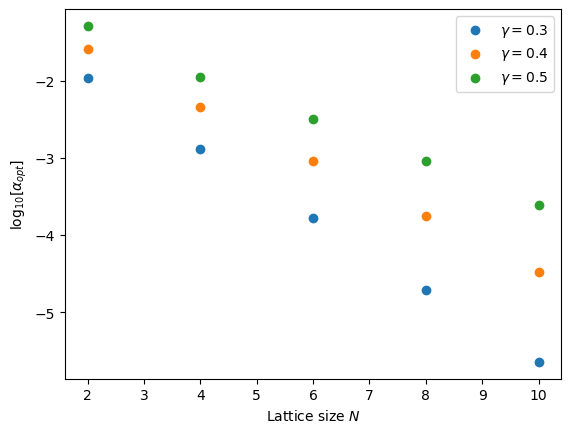

In [6]:
for kk, alpha in enumerate(alpha_list_gam):
    plt.scatter(Nlist, np.log10(alpha), label='$\gamma=%s$'%γ_list[kk])
plt.legend()
plt.xlabel("Lattice size $N$")
plt.ylabel(r"$\log_{10}[\alpha_{opt}]$")
plt.show()

## Figure 3.(a)
$$N=6, \alpha=2\times 10^{-4}$$

In [7]:
# system parameters
N = 6
E = 0
α = 2*1e-4

ωd = np.linspace(-0.25, 0.25, 1000)
γ = np.linspace(0, 0.5, 1000)

In [8]:
# construct Input and Output channels
mode_i = [np.sqrt(1/2), ("a", 0)]
mode_o = [np.sqrt(1/2), ("a", N-2)]
Input = qcs.Input_channel("b", mode_i, ωd)
Output = qcs.Output_channel("c", mode_o)

# construct effective Hamiltonian and calculate 2nd-order ETCF
g2_0_list_6 = np.zeros((len(ωd), len(γ)))

for kk, gam in enumerate(γ):
    Heff = []
    for i in range(N):
        Heff.append([(E-1j*gam/2), ("ad", i), ("a", i)])
        Heff.append([α, ("ad", i), ("ad", i), ("a", i), ("a", i)])
    for i in range(int(N/2)):
        Heff.append([1, ("ad", 2*i), ("a", 2*i+1)])
        Heff.append([1, ("a", 2*i), ("ad", 2*i+1)])
    for i in range(int(N/2)-1):
        Heff.append([t, ("ad", 2*i+1), ("a", 2*i+2)])
        Heff.append([t, ("a", 2*i+1), ("ad", 2*i+2)])

    result = qcs(Heff, Input, Output)
    g2_0_list_6[:, kk] = result.calculate_quantity("cc")

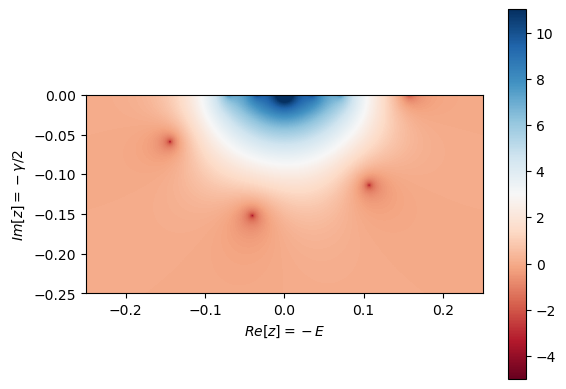

In [9]:
extent = np.min(-ωd), np.max(-ωd), np.min(-γ/2), np.max(-γ/2)
plt.imshow(np.log10(g2_0_list_6).T,cmap='RdBu', interpolation='nearest',extent=extent)
plt.colorbar()
plt.clim(-5, 11)
plt.xlabel("$Re[z]=-E$")
plt.ylabel(r"$Im[z]=-\gamma/2$")
plt.show()

## Figure 3.(a')
$$N=4, \alpha=2\times 10^{-3}$$

In [10]:
# system parameters
N = 4
E = 0
α = 2*1e-3

ωd = np.linspace(-0.25, 0.25, 1000)
γ = np.linspace(0, 0.5, 1000)

In [11]:
# construct Input and Output channels
mode_i = [np.sqrt(1/2), ("a", 0)]
mode_o = [np.sqrt(1/2), ("a", N-2)]
Input = qcs.Input_channel("b", mode_i, ωd)
Output = qcs.Output_channel("c", mode_o)

# construct effective Hamiltonian and calculate 2nd-order ETCF
g2_0_list_4 = np.zeros((len(ωd), len(γ)))

for kk, gam in enumerate(γ):
    Heff = []
    for i in range(N):
        Heff.append([(E-1j*gam/2), ("ad", i), ("a", i)])
        Heff.append([α, ("ad", i), ("ad", i), ("a", i), ("a", i)])
    for i in range(int(N/2)):
        Heff.append([1, ("ad", 2*i), ("a", 2*i+1)])
        Heff.append([1, ("a", 2*i), ("ad", 2*i+1)])
    for i in range(int(N/2)-1):
        Heff.append([t, ("ad", 2*i+1), ("a", 2*i+2)])
        Heff.append([t, ("a", 2*i+1), ("ad", 2*i+2)])

    result = qcs(Heff, Input, Output)
    g2_0_list_4[:, kk] = result.calculate_quantity("cc")

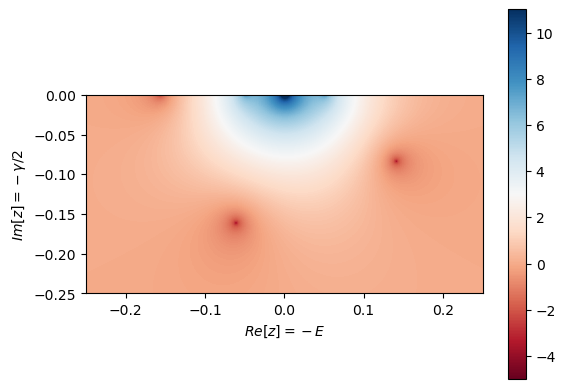

In [12]:
extent = np.min(-ωd), np.max(-ωd), np.min(-γ/2), np.max(-γ/2)
plt.imshow(np.log10(g2_0_list_4).T,cmap='RdBu', interpolation='nearest',extent=extent)
plt.colorbar()
plt.clim(-5, 11)
plt.xlabel("$Re[z]=-E$")
plt.ylabel(r"$Im[z]=-\gamma/2$")
plt.show()

## Figure 3.(a'')
$$N=2, \alpha=10^{-2}$$

In [13]:
# system parameters
N = 2
E = 0
α = 1e-2

ωd = np.linspace(-0.25, 0.25, 1000)
γ = np.linspace(0, 0.5, 1000)

In [14]:
# construct Input and Output channels
mode_i = [np.sqrt(1/2), ("a", 0)]
mode_o = [np.sqrt(1/2), ("a", N-2)]
Input = qcs.Input_channel("b", mode_i, ωd)
Output = qcs.Output_channel("c", mode_o)

# construct effective Hamiltonian and calculate 2nd-order ETCF
g2_0_list_2 = np.zeros((len(ωd), len(γ)))

for kk, gam in enumerate(γ):
    Heff = []
    for i in range(N):
        Heff.append([(E-1j*gam/2), ("ad", i), ("a", i)])
        Heff.append([α, ("ad", i), ("ad", i), ("a", i), ("a", i)])
    for i in range(int(N/2)):
        Heff.append([1, ("ad", 2*i), ("a", 2*i+1)])
        Heff.append([1, ("a", 2*i), ("ad", 2*i+1)])
    for i in range(int(N/2)-1):
        Heff.append([t, ("ad", 2*i+1), ("a", 2*i+2)])
        Heff.append([t, ("a", 2*i+1), ("ad", 2*i+2)])

    result = qcs(Heff, Input, Output)
    g2_0_list_2[:, kk] = result.calculate_quantity("cc")

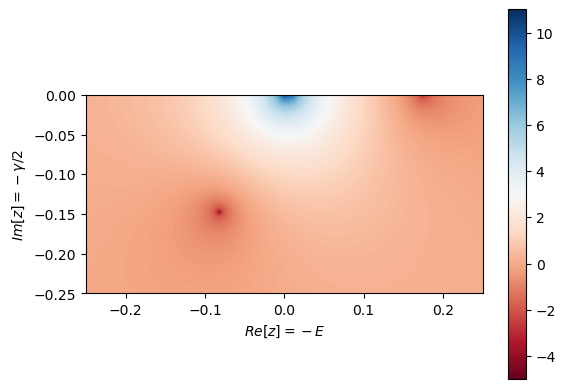

In [15]:
extent = np.min(-ωd), np.max(-ωd), np.min(-γ/2), np.max(-γ/2)
plt.imshow(np.log10(g2_0_list_2).T,cmap='RdBu', interpolation='nearest',extent=extent)
plt.colorbar()
plt.clim(-5, 11)
plt.xlabel("$Re[z]=-E$")
plt.ylabel(r"$Im[z]=-\gamma/2$")
plt.show()

## Figure 3.(b)

In [16]:
L_N_6 = np.argmin(np.log10(g2_0_list_6))
L_N_4 = np.argmin(np.log10(g2_0_list_4))
L_N_2 = np.argmin(np.log10(g2_0_list_2[:,200:]))
m_N_6 = int(L_N_6/1000)
m_N_4 = int(L_N_4/1000)
m_N_2 = int(L_N_2/800)
n_N_6 = L_N_6 - m_N_6*1000
n_N_4 = L_N_4 - m_N_4*1000
n_N_2 = L_N_2 - m_N_2*800

x = [m_N_2, m_N_4, m_N_6]
y = [200+n_N_2, n_N_4, n_N_6]

Nlist = [2, 4, 6]
α_list = [1e-2, 2e-3, 2e-4]

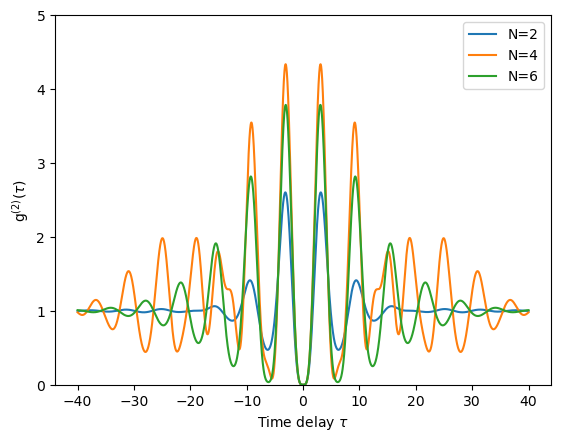

In [17]:
# construct Input and Output channels
tau = np.linspace(-40, 40, 4000)
for kk, N in enumerate(Nlist):
    Heff = []
    for i in range(N):
        Heff.append([(E-1j*γ[y[kk]]/2), ("ad", i), ("a", i)])
        Heff.append([α_list[kk], ("ad", i), ("ad", i), ("a", i), ("a", i)])
    for i in range(int(N/2)):
        Heff.append([1, ("ad", 2*i), ("a", 2*i+1)])
        Heff.append([1, ("a", 2*i), ("ad", 2*i+1)])
    for i in range(int(N/2)-1):
        Heff.append([t, ("ad", 2*i+1), ("a", 2*i+2)])
        Heff.append([t, ("a", 2*i+1), ("ad", 2*i+2)])
        
    mode_i = [np.sqrt(1/2), ("a", 0)]
    mode_o = [np.sqrt(1/2), ("a", N-2)]
    Input = qcs.Input_channel("b", mode_i, ωd[x[kk]])
    Output = qcs.Output_channel("c", mode_o)
    
    result = qcs(Heff, Input, Output)
    g2_tau = result.calculate_2nd_uETCF('c', tau)
    
    plt.plot(tau, g2_tau, label='N=%s'%N)
    plt.ylim([0, 5])
    
plt.ylabel(r"g$^{(2)}(\tau)$")
plt.xlabel(r"Time delay $\tau$")
plt.legend()
plt.show()

## Figure S1 in appendix

In [18]:
# system fixed parameters
E = 0

ωd = np.linspace(-0.25, 0.25, 1000)
γ = np.linspace(-0.5, 0.5, 1000)

In [19]:
# system parameters
N = 2
α = 1e-2

In [20]:
# construct Input and Output channels
mode_i = [np.sqrt(1/2), ("a", 0)]
mode_o = [np.sqrt(1/2), ("a", N-2)]
Input = qcs.Input_channel("b", mode_i, ωd)
Output = qcs.Output_channel("c", mode_o)

# construct effective Hamiltonian and calculate 2nd-order ETCF
g2_0_list_2_appendix = np.zeros((len(ωd), len(γ)))

for kk, gam in enumerate(γ):
    Heff = []
    for i in range(N):
        Heff.append([(E-1j*gam/2), ("ad", i), ("a", i)])
        Heff.append([α, ("ad", i), ("ad", i), ("a", i), ("a", i)])
    for i in range(int(N/2)):
        Heff.append([1, ("ad", 2*i), ("a", 2*i+1)])
        Heff.append([1, ("a", 2*i), ("ad", 2*i+1)])
    for i in range(int(N/2)-1):
        Heff.append([t, ("ad", 2*i+1), ("a", 2*i+2)])
        Heff.append([t, ("a", 2*i+1), ("ad", 2*i+2)])

    result = qcs(Heff, Input, Output)
    g2_0_list_2_appendix[:, kk] = result.calculate_quantity("cc")

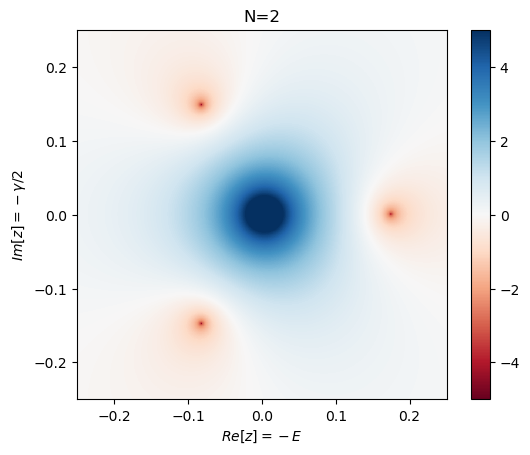

In [50]:
extent = np.min(-ωd), np.max(-ωd), np.min(-γ/2), np.max(-γ/2)
plt.imshow(np.log10(g2_0_list_2_appendix).T,cmap='RdBu', interpolation='nearest',extent=extent)
plt.colorbar()
plt.clim(-5, 5)
plt.xlabel("$Re[z]=-E$")
plt.ylabel(r"$Im[z]=-\gamma/2$")
plt.title("N=2")
plt.show()

In [22]:
# system parameters
N = 4
α = 2e-3

In [23]:
# construct Input and Output channels
mode_i = [np.sqrt(1/2), ("a", 0)]
mode_o = [np.sqrt(1/2), ("a", N-2)]
Input = qcs.Input_channel("b", mode_i, ωd)
Output = qcs.Output_channel("c", mode_o)

# construct effective Hamiltonian and calculate 2nd-order ETCF
g2_0_list_4_appendix = np.zeros((len(ωd), len(γ)))

for kk, gam in enumerate(γ):
    Heff = []
    for i in range(N):
        Heff.append([(E-1j*gam/2), ("ad", i), ("a", i)])
        Heff.append([α, ("ad", i), ("ad", i), ("a", i), ("a", i)])
    for i in range(int(N/2)):
        Heff.append([1, ("ad", 2*i), ("a", 2*i+1)])
        Heff.append([1, ("a", 2*i), ("ad", 2*i+1)])
    for i in range(int(N/2)-1):
        Heff.append([t, ("ad", 2*i+1), ("a", 2*i+2)])
        Heff.append([t, ("a", 2*i+1), ("ad", 2*i+2)])

    result = qcs(Heff, Input, Output)
    g2_0_list_4_appendix[:, kk] = result.calculate_quantity("cc")

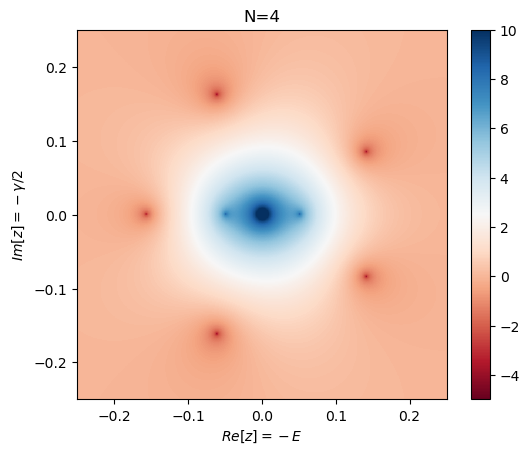

In [41]:
extent = np.min(-ωd), np.max(-ωd), np.min(-γ/2), np.max(-γ/2)
plt.imshow(np.log10(g2_0_list_4_appendix).T,cmap='RdBu', interpolation='nearest',extent=extent)
plt.colorbar()
plt.clim(-5, 10)
plt.xlabel("$Re[z]=-E$")
plt.ylabel(r"$Im[z]=-\gamma/2$")
plt.title("N=4")
plt.show()

In [26]:
# system parameters
N = 6
α = 2e-4

In [27]:
# construct Input and Output channels
mode_i = [np.sqrt(1/2), ("a", 0)]
mode_o = [np.sqrt(1/2), ("a", N-2)]
Input = qcs.Input_channel("b", mode_i, ωd)
Output = qcs.Output_channel("c", mode_o)

# construct effective Hamiltonian and calculate 2nd-order ETCF
g2_0_list_6_appendix = np.zeros((len(ωd), len(γ)))

for kk, gam in enumerate(γ):
    Heff = []
    for i in range(N):
        Heff.append([(E-1j*gam/2), ("ad", i), ("a", i)])
        Heff.append([α, ("ad", i), ("ad", i), ("a", i), ("a", i)])
    for i in range(int(N/2)):
        Heff.append([1, ("ad", 2*i), ("a", 2*i+1)])
        Heff.append([1, ("a", 2*i), ("ad", 2*i+1)])
    for i in range(int(N/2)-1):
        Heff.append([t, ("ad", 2*i+1), ("a", 2*i+2)])
        Heff.append([t, ("a", 2*i+1), ("ad", 2*i+2)])

    result = qcs(Heff, Input, Output)
    g2_0_list_6_appendix[:, kk] = result.calculate_quantity("cc")

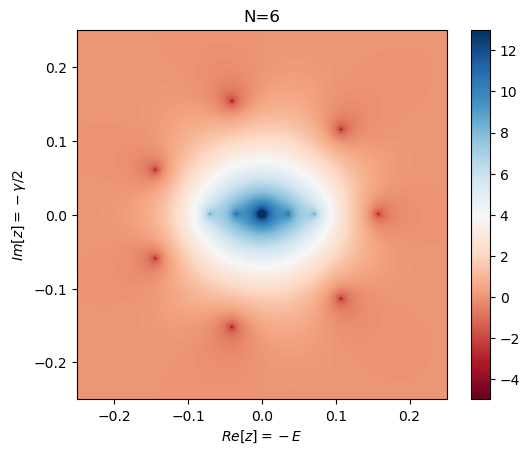

In [48]:
extent = np.min(-ωd), np.max(-ωd), np.min(-γ/2), np.max(-γ/2)
plt.imshow(np.log10(g2_0_list_6_appendix).T,cmap='RdBu', interpolation='nearest',extent=extent)
plt.colorbar()
plt.clim(-5, 13)
plt.xlabel("$Re[z]=-E$")
plt.ylabel(r"$Im[z]=-\gamma/2$")
plt.title("N=6")
plt.show()

In [29]:
# system parameters
N = 8
α = 2e-5

In [30]:
# construct Input and Output channels
mode_i = [np.sqrt(1/2), ("a", 0)]
mode_o = [np.sqrt(1/2), ("a", N-2)]
Input = qcs.Input_channel("b", mode_i, ωd)
Output = qcs.Output_channel("c", mode_o)

# construct effective Hamiltonian and calculate 2nd-order ETCF
g2_0_list_8_appendix = np.zeros((len(ωd), len(γ)))

for kk, gam in enumerate(γ):
    Heff = []
    for i in range(N):
        Heff.append([(E-1j*gam/2), ("ad", i), ("a", i)])
        Heff.append([α, ("ad", i), ("ad", i), ("a", i), ("a", i)])
    for i in range(int(N/2)):
        Heff.append([1, ("ad", 2*i), ("a", 2*i+1)])
        Heff.append([1, ("a", 2*i), ("ad", 2*i+1)])
    for i in range(int(N/2)-1):
        Heff.append([t, ("ad", 2*i+1), ("a", 2*i+2)])
        Heff.append([t, ("a", 2*i+1), ("ad", 2*i+2)])

    result = qcs(Heff, Input, Output)
    g2_0_list_8_appendix[:, kk] = result.calculate_quantity("cc")

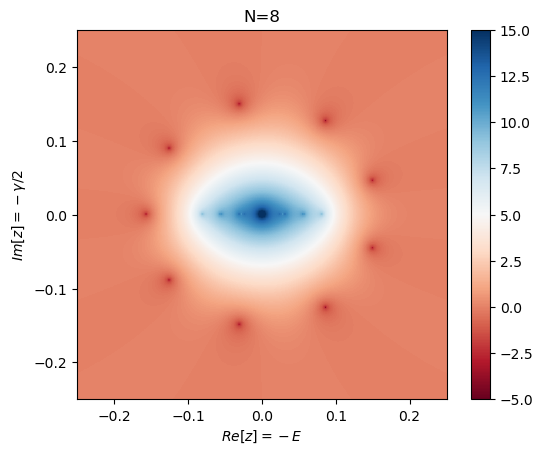

In [47]:
extent = np.min(-ωd), np.max(-ωd), np.min(-γ/2), np.max(-γ/2)
plt.imshow(np.log10(g2_0_list_8_appendix).T,cmap='RdBu', interpolation='nearest',extent=extent)
plt.colorbar()
plt.clim(-5, 15)
plt.xlabel("$Re[z]=-E$")
plt.ylabel(r"$Im[z]=-\gamma/2$")
plt.title("N=8")
plt.show()